Univariate Groundwater Time Series Analysis and Forecasting with Python

 About Time Series analysis
* Time series analysis comprises methods for analyzing time series data in order to extract meaningful statistics and other characteristics of the data.
* Time series forecasting is the use of a model to predict future values based on previously observed values.

In [1]:
# importing libreries and changing their name

import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib

plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

## The Data

<p>We are using Ground Water Data.</p>

In [2]:
# read the excel file
furniture = pd.read_excel("Budi_data3_.xls")
furniture.head()

,Row ID,Order ID,Measurement Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,GWE,Quantity,Discount,Profit
0,1,0,2005-01-01,2005-01-01,Standard Class,0,Departemen Water Resource,Mojave River Basin,United States,Apple Valley,...,92307,Central,Monitoring Well Data,Hydrogeology,Flow Direction,Groundwater Level,2723.000000,1,1,1
1,2,0,2005-02-01,2005-02-01,Standard Class,1,Departemen Water Resource,Mojave River Basin,United States,Apple Valley,...,92307,Central,Monitoring Well Data,Hydrogeology,Flow Direction,Groundwater Level,2722.500000,1,1,1
2,3,0,2005-03-01,2005-03-01,Standard Class,2,Departemen Water Resource,Mojave River Basin,United States,Apple Valley,...,92307,Central,Monitoring Well Data,Hydrogeology,Flow Direction,Groundwater Level,2722.400000,1,1,1
3,4,0,2005-04-01,2005-04-01,Standard Class,3,Departemen Water Resource,Mojave River Basin,United States,Apple Valley,...,92307,Central,Monitoring Well Data,Hydrogeology,Flow Direction,Groundwater Level,2722.240000,1,1,1
4,5,0,2005-05-01,2005-05-01,Standard Class,4,Departemen Water Resource,Mojave River Basin,United States,Apple Valley,...,92307,Central,Monitoring Well Data,Hydrogeology,Flow Direction,Groundwater Level,2723.194545,1,1,1


In [3]:
furniture.describe()

,Row ID,Order ID,Customer ID,Postal Code,GWE,Quantity,Discount,Profit
count,168.000000,168.0,168.000000,168.0,168.000000,168.0,168.0,168.0
mean,84.500000,0.0,83.500000,92307.0,2725.496131,1.0,1.0,1.0
std,48.641546,0.0,48.641546,0.0,12.316085,0.0,0.0,0.0
min,1.000000,0.0,0.000000,92307.0,2675.240000,1.0,1.0,1.0
25%,42.750000,0.0,41.750000,92307.0,2720.461875,1.0,1.0,1.0
50%,84.500000,0.0,83.500000,92307.0,2727.963637,1.0,1.0,1.0
75%,126.250000,0.0,125.250000,92307.0,2733.144375,1.0,1.0,1.0
max,168.000000,0.0,167.000000,92307.0,2739.630000,1.0,1.0,1.0


## Data Preprocessing

In [4]:
# Remove columns which are not required in predictions

cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis = 1, inplace = True)
furniture.head()

,Measurement Date,GWE
0,2005-01-01,2723.000000
1,2005-02-01,2722.500000
2,2005-03-01,2722.400000
3,2005-04-01,2722.240000
4,2005-05-01,2723.194545


In [5]:
# Sort the Order Date 
furniture = furniture.sort_values('Measurement Date')

#print the sorted values
print(furniture.head(1))

#check any missing values
furniture.isnull().sum()

  Measurement Date     GWE
0       2005-01-01  2723.0


Measurement Date    0
GWE                 0
dtype: int64

In [6]:
# grouping sales according to Order Date
furniture.groupby('Measurement Date')['GWE'].sum().reset_index()

# min and max values of Order Date
print(furniture['Measurement Date'].min())
print(furniture['Measurement Date'].max())

2005-01-01 00:00:00
2018-12-01 00:00:00


In [7]:
#set 'Order Date' as index
furniture = furniture.set_index('Measurement Date')
furniture.index

DatetimeIndex(['2005-01-01', '2005-02-01', '2005-03-01', '2005-04-01',
               '2005-05-01', '2005-06-01', '2005-07-01', '2005-08-01',
               '2005-09-01', '2005-10-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', name='Measurement Date', length=168, freq=None)

In [8]:
# average the daily sales value for each month 
# use start of each month as the timestamp
y = furniture['GWE'].resample('MS').mean()
y['2017':]

Measurement Date
2017-01-01    2736.710000
2017-02-01    2736.885000
2017-03-01    2737.060000
2017-04-01    2737.176154
2017-05-01    2737.292308
2017-06-01    2737.408462
2017-07-01    2737.524615
2017-08-01    2737.640769
2017-09-01    2737.756923
2017-10-01    2737.873077
2017-11-01    2737.989231
2017-12-01    2738.105385
2018-01-01    2738.221538
2018-02-01    2738.337692
2018-03-01    2738.453846
2018-04-01    2738.570000
2018-05-01    2738.702500
2018-06-01    2738.835000
2018-07-01    2738.967500
2018-08-01    2739.100000
2018-09-01    2739.232500
2018-10-01    2739.365000
2018-11-01    2739.497500
2018-12-01    2739.630000
Freq: MS, Name: GWE, dtype: float64

## Data Visualization

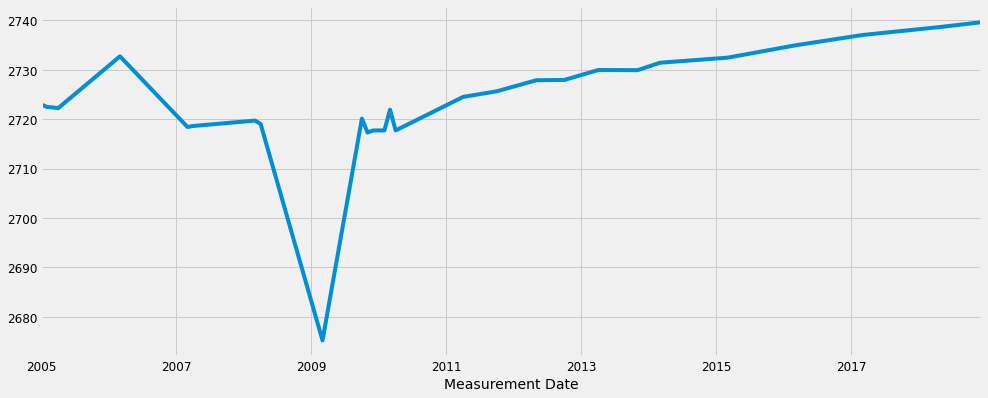

In [9]:
y.plot(figsize = (15, 6))
plt.show()

# Time-series decompositon 
* It allows us to decompose our time series into three distinct components
<ul>
<li>Trend</li>
<li>Seasonality</li>
<li>Noise</li>
</ul>


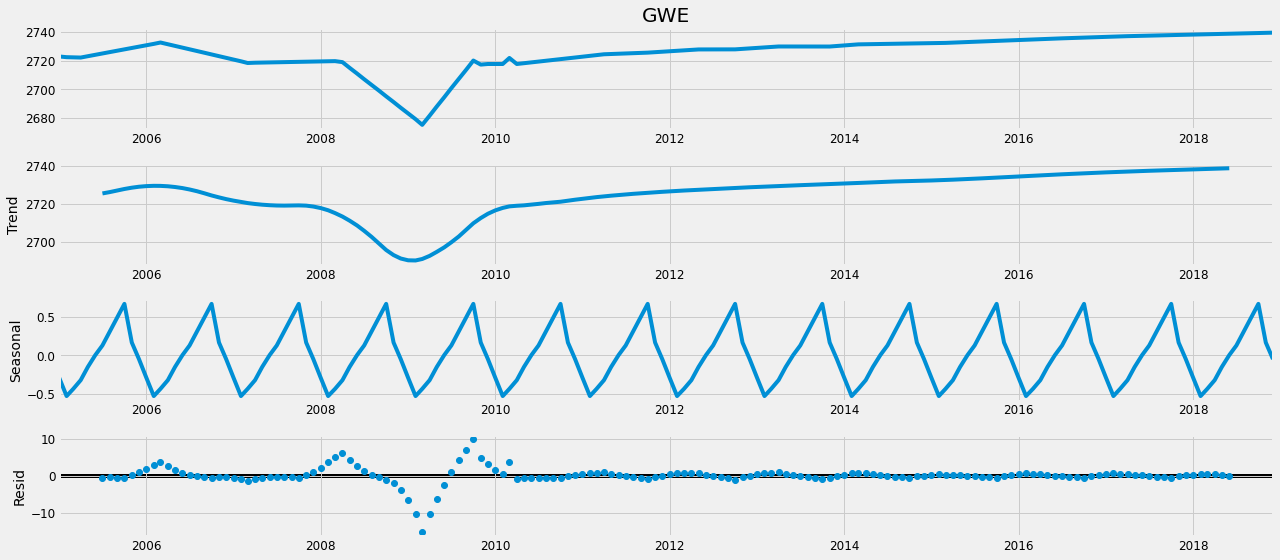

In [10]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(y, model = 'additive')
fig = decomposition.plot()
plt.show()

## Time series forecasting with ARIMA model

<p>
    <b><i>About ARIMA model</i></b>
<ul>
    <li>ARIMA stands for <i>Autoregressive Integreted Moving Average</i></li>
    <li>ARIMA models are denoted with the notation <i>ARIMA(p, d, q)</i></li>
    <li>These three parameters account for <i>seasonality, trend, and noise</i> in data</li>
</ul>
</p>

In [11]:
# set the typical ranges for p, d, q
p = d = q = range(0, 2)

#take all possible combination for p, d and q
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))


Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [12]:
# Using Grid Search find the optimal set of parameters that yields the best performance
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order = param, seasonal_order = param_seasonal, enforce_stationary = False,enforce_invertibility=False) 
            result = mod.fit()   
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, result.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:3136.6630915787596
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2949.132879579921
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1228.410580280261
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1212.9770529273733


D:\ProgramData\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
D:\ProgramData\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1456.5005451554528
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1501.7022669332193
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1214.6597846137015
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1216.7679712846384
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:3016.9966248510063
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2723.0688224239875
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1029.1160937769353
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1013.3987043277135


D:\ProgramData\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1549.728912970936


D:\ProgramData\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1444.8577531429787
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1015.0873231000338
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1012.8417856438048
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:672.2533114046876
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:653.4195851119651
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:788.0115518633474
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:666.4674981310188
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:654.2808638866227
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:655.3427171009866
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:706.2270339406516
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:653.5514071425168
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:610.2930454970373
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:592.8967719254764
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:728.4496336326708
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:608.7615711088517
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:594.8215492017572
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:594.5494492484005
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:653.4594421060772
ARIMA(0

D:\ProgramData\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\ProgramData\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\ProgramData\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:696.9168486325821
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:794.3279557872158
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:671.6613072801831


D:\ProgramData\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:675.0052474964397


D:\ProgramData\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:774.4457085573131
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:712.8959676307875
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:658.5329979397259
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:701.2663751033031


D:\ProgramData\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\ProgramData\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:642.0757107302516
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:733.4514846582301
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:614.0452545383471


D:\ProgramData\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:616.6233515653253


D:\ProgramData\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:838.7639864502872
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:659.44626165723


D:\ProgramData\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:665.7209953565782
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:566.7886533902177
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:550.8520688088342
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:686.8727897871468
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:567.8747426722495
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:552.9238379999883
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:552.554664485106
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:615.3280347974417
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:557.7014190082107
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:564.5275635876657
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:548.8973853394875
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:685.0200367413017
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:565.7481220667148
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:550.5743814125997
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:550.7141558844341
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:612.1579679764886
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:555.4076342218641


###### Fitting the ARIMA model

In [13]:
#Fitting the ARIMA model using above optimal combination of p, d, q (optimal means combination at which we got lowest AIC score)

model = sm.tsa.statespace.SARIMAX(y, order = (1, 1, 1),
                                  seasonal_order = (1, 1, 0, 12)
                                 )
result = model.fit()
print(result.summary().tables[1])


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7907      0.049     16.088      0.000       0.694       0.887
ma.L1         -0.2190      0.062     -3.528      0.000      -0.341      -0.097
ar.S.L12      -0.5979      0.028    -21.184      0.000      -0.653      -0.543
sigma2         2.7784      0.189     14.716      0.000       2.408       3.148


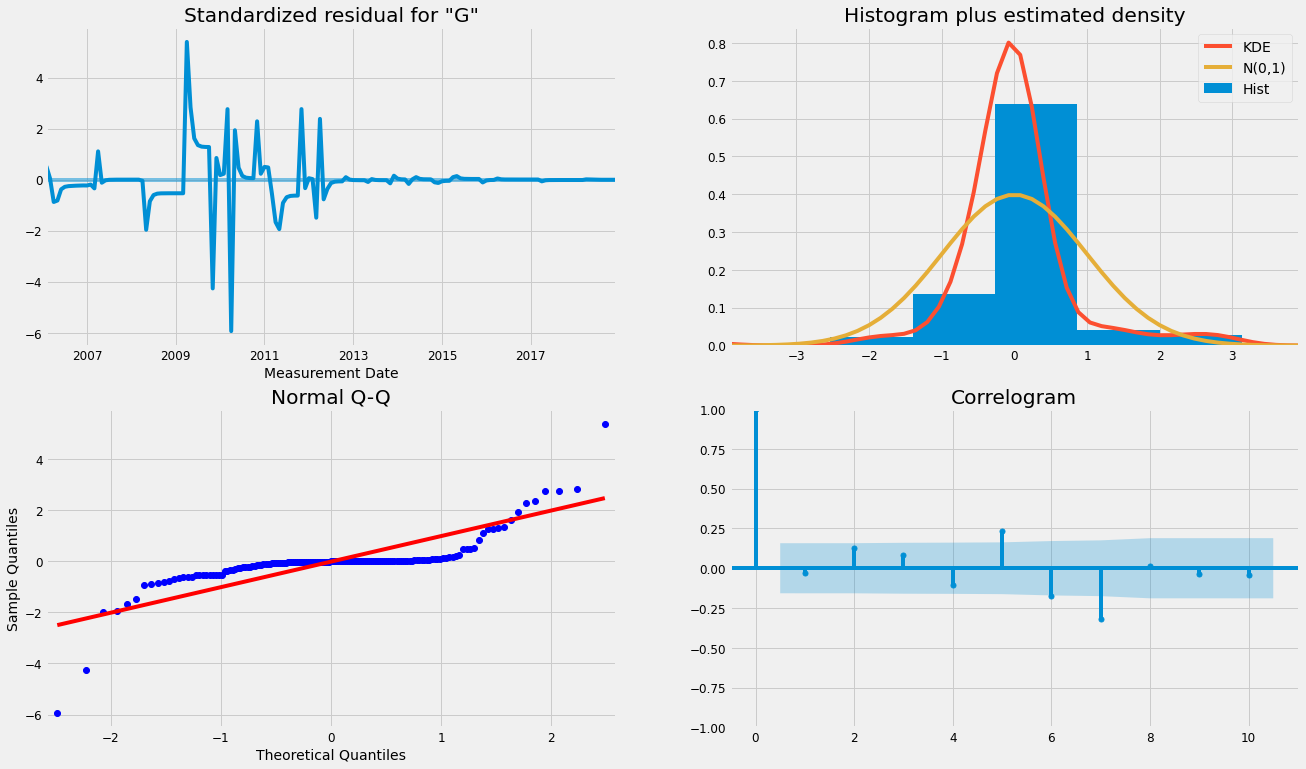

In [14]:
#run model diagnostic to investigate any unusual behavior
result.plot_diagnostics(figsize = (20, 12))
plt.show()

<p>It is not perfect, however, our model diagnostics suggests that the model residuals are near normally distributed.</p>

###### Validating Forecasts

<p>
To help us understand the accuracy of our forecasts, we compare predicted GWE to real GWE of the time series, and we set forecasts to start at <i>2017–01–01</i> to <i>the end of the data.</i>
</p>

In [15]:
prediction = result.get_prediction(start = pd.to_datetime('2013-01-01'), dynamic = False)
prediction_ci = prediction.conf_int()
prediction_ci

,lower GWE,upper GWE
Measurement Date,,
2013-01-01,2725.723740,2732.257671
2013-02-01,2726.066171,2732.600102
2013-03-01,2726.402798,2732.936730
2013-04-01,2726.738154,2733.272086
2013-05-01,2726.848520,2733.382452
...,...,...
2018-08-01,2735.837885,2742.371817
2018-09-01,2735.970540,2742.504471
2018-10-01,2736.103074,2742.637005


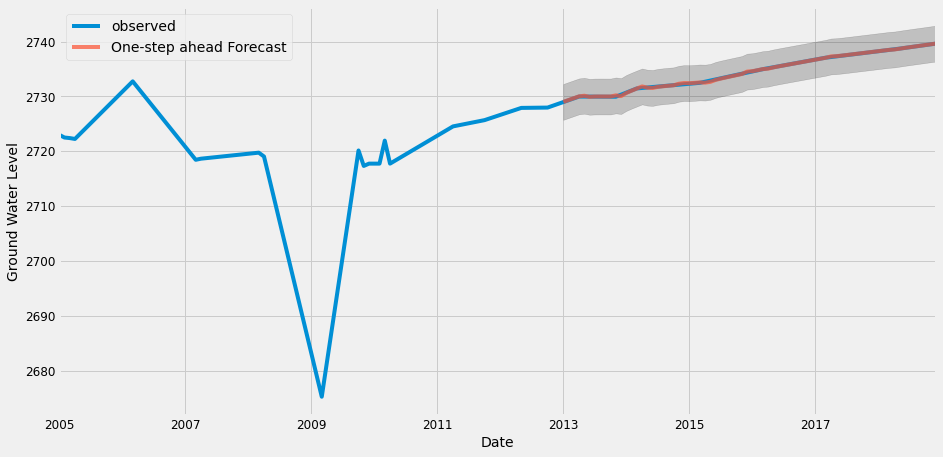

In [16]:
#Visualize the forecasting
ax = y['2005':].plot(label = 'observed')
prediction.predicted_mean.plot(ax = ax, label = 'One-step ahead Forecast', alpha = 0.7, figsize = (14, 7))
ax.fill_between(prediction_ci.index, prediction_ci.iloc[:, 0], prediction_ci.iloc[:, 1], color = 'k', alpha = 0.2)
ax.set_xlabel("Date")
ax.set_ylabel('Ground Water Level')
plt.legend()
plt.show()

<p>The line plot is showing the observed values compared to the rolling forecast predictions. Overall, our forecasts align with the true values very well, showing an upward trend starts from the beginning of the year and captured the seasonality toward the end of the year.
</p>

###### Error Analysis

In [17]:
# Evaluation metrics are Squared Mean Error(SME) and Root Mean Squared Error(RMSE)
y_hat = prediction.predicted_mean
y_truth = y['2013-01-01':]

mse = ((y_hat - y_truth) ** 2).mean()
rmse = np.sqrt(mse)
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 4)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 4)))


The Mean Squared Error of our forecasts is 0.0075
The Root Mean Squared Error of our forecasts is 0.0863


##### Producing and visualizing forecasts

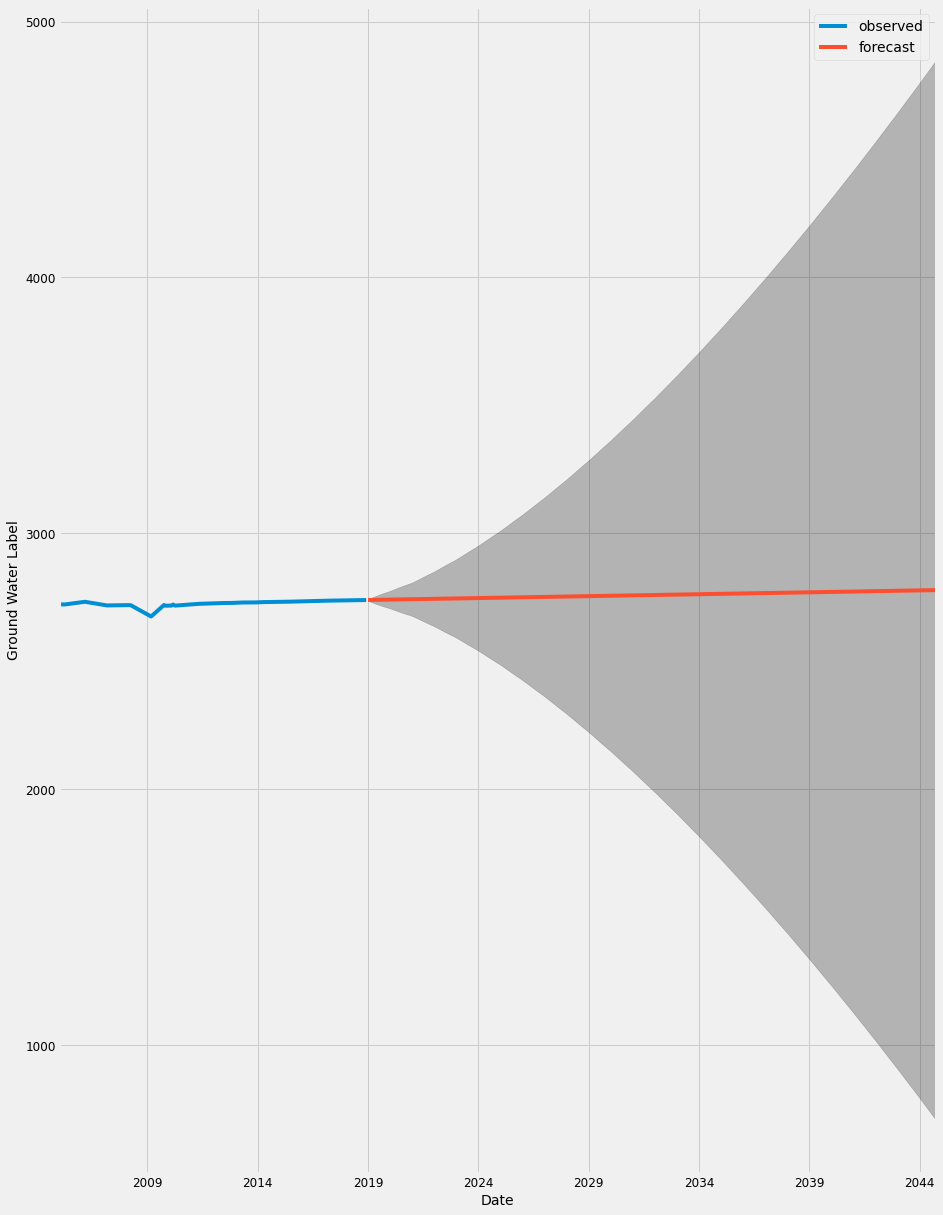

In [24]:
# forcasting for out of sample data
pred_uc = result.get_forecast(steps = 310)
pred_ci = pred_uc.conf_int()

ax = y.plot(label = 'observed', figsize = (14, 20))
pred_uc.predicted_mean.plot(ax = ax, label = 'forecast')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color = 'k', alpha = 0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Ground Water Label')

plt.legend()
plt.show()


## Summary

<ul>
<li>Our model clearly captured Ground Water seasonality.</li>
<li>As we forecast further out into the future, it is natural for us to become less confident in our values.</li>
<li>This is reflected by the confidence intervals generated by our model, which grow larger as we move further out into the future.</li>

</ul>

In [19]:
pred_uc.predicted_mean['2030'].describe()

count      12.000000
mean     2756.944565
std         0.447108
min      2756.258190
25%      2756.605192
50%      2756.941558
75%      2757.284582
max      2757.629776
Name: predicted_mean, dtype: float64

In [20]:
df = pd.DataFrame(pred_uc.predicted_mean['2030'])
display(df)

,predicted_mean
2030-01-01,2756.258190
2030-02-01,2756.389073
2030-03-01,2756.521473
2030-04-01,2756.633098
2030-05-01,2756.755914
2030-06-01,2756.879479
2030-07-01,2757.003636
2030-08-01,2757.128263
2030-09-01,2757.253260
2030-10-01,2757.378550


In [21]:
aax_new = pred_ci.DataFrame()
display(aax_new)

AttributeError: 'DataFrame' object has no attribute 'DataFrame'